In [1]:
import pyxdf

# Path to your XDF file
xdf_file_path = '/Users/wanne/OneDrive/Dokumente/CurrentStudy/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-Default_run-002_eeg.xdf'

# Load the XDF file
streams, fileheader = pyxdf.load_xdf(xdf_file_path)

# Iterate over each stream in the file
for i, stream in enumerate(streams):
    print(f"Stream {i+1}")
    print(f"Name: {stream['info']['name'][0]}")
    print(f"Type: {stream['info']['type'][0]}")
    print(f"Channel Count: {stream['info']['channel_count'][0]}")
    print(f"Sample Rate: {stream['info']['nominal_srate'][0]}")
    print("First few samples with timestamps:")
    for sample, timestamp in zip(stream['time_series'][:5], stream['time_stamps'][:5]):  # Adjust the number of samples to display
        print(f"Timestamp: {timestamp}, Sample: {sample}")
    print("\n")



Stream 1
Name: Prompts
Type: Markers
Channel Count: 1
Sample Rate: 0.000000000000000
First few samples with timestamps:
Timestamp: 1211355.459718976, Sample: ['Try to decrease your alpha power']
Timestamp: 1211365.4573453949, Sample: ['Try to increase your alpha power']


Stream 2
Name: gtec_outlet
Type: data
Channel Count: 19
Sample Rate: 500.0000000000000
First few samples with timestamps:
Timestamp: 1211350.200466792, Sample: [ 3.1508760e+03  1.6977061e+04  1.0047636e+04  1.0345889e+04
  1.4142434e+04  1.0923140e+04  6.9153091e+03  1.9030500e+04
  9.9615547e+03  1.0614639e+04  5.9390654e+03  8.1438140e+03
  1.2274770e+04  1.0978279e+04  1.5577955e+04  1.2217399e+04
 -1.5643962e-02  1.1889411e+00 -1.5643962e-01]
Timestamp: 1211350.2024666646, Sample: [ 3.4328110e+03  1.7248084e+04  1.0341601e+04  1.0626188e+04
  1.4426464e+04  1.1202068e+04  7.1957124e+03  1.9328961e+04
  1.0247533e+04  1.0898402e+04  6.2214087e+03  8.4277695e+03
  1.2560554e+04  1.1245461e+04  1.5855633e+04  1.25018

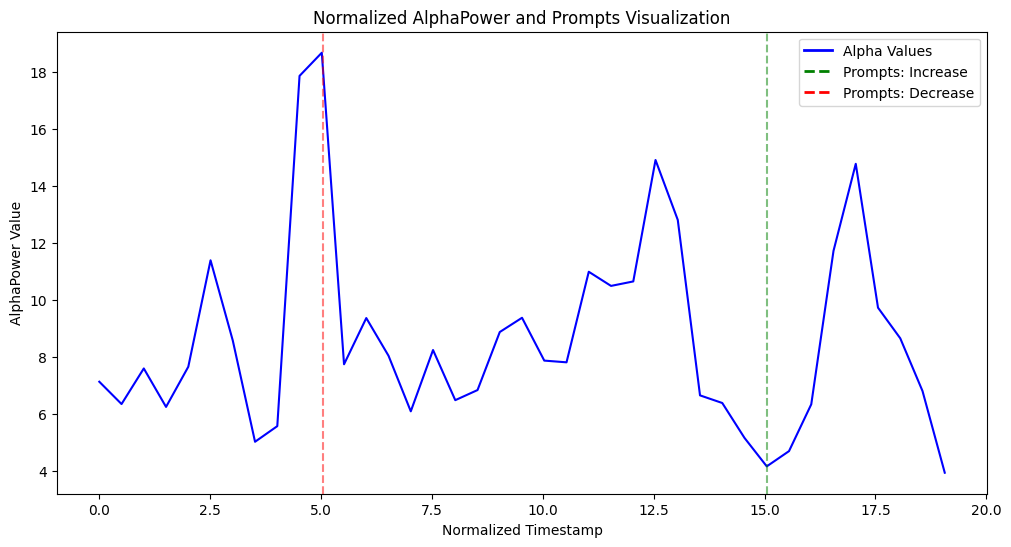

In [3]:
import pyxdf
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Open the XDF file for reading
file_streams, _ = pyxdf.load_xdf('/Users/wanne/OneDrive/Dokumente/CurrentStudy/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-Default_run-002_eeg.xdf')

alpha_stream = None
prompts_stream = None

# Find the 'AlphaPower' and 'Prompts' streams
for file_stream in file_streams:
    stream_name = file_stream['info']['name'][0]

    if stream_name == 'AlphaPower':
        alpha_stream = file_stream
    elif stream_name == 'Prompts':
        prompts_stream = file_stream

if alpha_stream is not None and prompts_stream is not None:
    # Extract timestamps and time series data
    alpha_timestamps = alpha_stream['time_stamps']
    alpha_time_series = alpha_stream['time_series']
    prompts_timestamps = prompts_stream['time_stamps']
    prompts_values = prompts_stream['time_series']

    # Normalize the timestamps
    min_timestamp = min(min(alpha_timestamps), min(prompts_timestamps))
    normalized_alpha_timestamps = [timestamp - min_timestamp for timestamp in alpha_timestamps]
    normalized_prompts_timestamps = [timestamp - min_timestamp for timestamp in prompts_timestamps]

    # Extract alpha values and prompt statements
    alpha_values = [sample[0] for sample in alpha_time_series]
    prompt_statements = [sample[0] for sample in prompts_values]

    # Plot the AlphaPower values with normalized timestamps
    plt.figure(figsize=(12, 6))
    plt.plot(normalized_alpha_timestamps, alpha_values, label='Alpha Values', color='blue')

    # Add vertical lines for prompts with normalized timestamps
    for timestamp, statement in zip(normalized_prompts_timestamps, prompt_statements):
        line_color = 'green' if 'increase' in statement.lower() else 'red'
        plt.axvline(x=timestamp, color=line_color, linestyle='--', alpha=0.5)

    # Set plot labels and title
    plt.xlabel('Normalized Timestamp')
    plt.ylabel('AlphaPower Value')
    plt.title('Normalized AlphaPower and Prompts Visualization')

    # Define custom legend labels and handles
    custom_legend_labels = ['Alpha Values', 'Prompts: Increase', 'Prompts: Decrease']
    custom_legend_handles = [
        Line2D([0], [0], color='blue', lw=2),
        Line2D([0], [0], color='green', lw=2, linestyle='--'),
        Line2D([0], [0], color='red', lw=2, linestyle='--')
    ]

    # Create the custom legend
    plt.legend(custom_legend_handles, custom_legend_labels)

    plt.show()
